<a href="https://colab.research.google.com/github/snvssk/data298A/blob/development/SolarEnergy/MLModels/Solar_ANN_AllDataPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df= pd.read_csv('/content/drive/MyDrive/all_cities_transformed_combined.csv')
df

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,0,2018.0,1.0,1.0,0.0,0.0,11.2,4.0,10.2,0.0,93.63,165.41,0.100,1024.0,1.700,294.0,0.7,117987.0
1,1,2018.0,1.0,1.0,0.0,30.0,11.2,4.0,10.2,0.0,93.63,165.11,0.100,1024.0,1.700,307.0,0.7,117987.0
2,2,2018.0,1.0,1.0,1.0,0.0,11.1,4.0,10.1,0.0,93.38,162.29,0.100,1024.0,1.700,321.0,0.7,117987.0
3,3,2018.0,1.0,1.0,1.0,30.0,11.0,0.0,10.1,0.0,94.00,157.91,0.100,1024.0,1.800,332.0,0.7,117987.0
4,4,2018.0,1.0,1.0,2.0,0.0,10.9,0.0,9.9,0.0,93.32,152.72,0.100,1024.0,1.800,344.0,0.7,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946181,946181,2013.0,12.0,31.0,21.0,30.0,6.0,1.0,0.0,0.0,74.05,142.58,0.113,1020.0,0.950,174.5,0.6,117546.0
946182,946182,2013.0,12.0,31.0,22.0,0.0,6.0,1.0,0.0,0.0,74.40,148.35,0.113,1020.0,0.977,152.1,0.9,117546.0
946183,946183,2013.0,12.0,31.0,22.0,30.0,5.0,0.0,0.0,0.0,79.80,153.89,0.113,1020.0,0.972,152.1,1.1,117546.0
946184,946184,2013.0,12.0,31.0,23.0,0.0,4.0,0.0,0.0,0.0,80.32,158.95,0.113,1020.0,0.968,166.7,1.3,117546.0


In [11]:
# nsrdb_na = df.drop(columns='Unnamed: 0')
nsrdb_na = df.copy()
#null_rows = nsrdb_na[nsrdb_na.isna().any(axis=1)]
#null_rows
nsrdb_na.isnull().sum()
#nsrdb_na.columns
#nsrdb_na['GHI'].isnull().values.sum()
nsrdb = nsrdb_na.dropna()
#print(nsrdb)
nsrdb.isnull().sum()

Unnamed: 0            0
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Cloud_Type            0
Dew_Point             0
GHI                   0
Relative_Humidity     0
Solar_Zenith_Angle    0
Surface_Albedo        0
Pressure              0
Precipitable_Water    0
Wind_Direction        0
Wind_Speed            0
Location              0
dtype: int64

In [12]:
nsrdb= nsrdb.drop(['Unnamed: 0'], axis=1)
target = nsrdb['GHI']#keeping only target(ghi) data here
input= nsrdb.drop(['GHI'], axis=1)
input

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,2018.0,1.0,1.0,0.0,0.0,11.2,4.0,10.2,93.63,165.41,0.100,1024.0,1.700,294.0,0.7,117987.0
1,2018.0,1.0,1.0,0.0,30.0,11.2,4.0,10.2,93.63,165.11,0.100,1024.0,1.700,307.0,0.7,117987.0
2,2018.0,1.0,1.0,1.0,0.0,11.1,4.0,10.1,93.38,162.29,0.100,1024.0,1.700,321.0,0.7,117987.0
3,2018.0,1.0,1.0,1.0,30.0,11.0,0.0,10.1,94.00,157.91,0.100,1024.0,1.800,332.0,0.7,117987.0
4,2018.0,1.0,1.0,2.0,0.0,10.9,0.0,9.9,93.32,152.72,0.100,1024.0,1.800,344.0,0.7,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946181,2013.0,12.0,31.0,21.0,30.0,6.0,1.0,0.0,74.05,142.58,0.113,1020.0,0.950,174.5,0.6,117546.0
946182,2013.0,12.0,31.0,22.0,0.0,6.0,1.0,0.0,74.40,148.35,0.113,1020.0,0.977,152.1,0.9,117546.0
946183,2013.0,12.0,31.0,22.0,30.0,5.0,0.0,0.0,79.80,153.89,0.113,1020.0,0.972,152.1,1.1,117546.0
946184,2013.0,12.0,31.0,23.0,0.0,4.0,0.0,0.0,80.32,158.95,0.113,1020.0,0.968,166.7,1.3,117546.0


In [13]:
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
input_normalized = sc.fit_transform(input)

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(input_normalized, target, test_size=0.3, random_state=42)

In [28]:
from tensorflow.keras.optimizers import Adam
import pandas as pd
import os
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from random import randint
from glob import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Normalization(axis=None))
model.add(layers.Dense(500, activation="relu"))
model.add(layers.Dense(400, activation="relu"))
model.add(layers.Dense(200, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(1, activation='relu'))

In [30]:
#Compile and train
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae',keras.metrics.RootMeanSquaredError()])

In [31]:
history = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
10348/10348 [==============================] - 99s 10ms/step - loss: 2324.1899 - mae: 19.9568 - root_mean_squared_error: 48.2099
Epoch 2/50
10348/10348 [==============================] - 98s 9ms/step - loss: 1574.0336 - mae: 16.0713 - root_mean_squared_error: 39.6741
Epoch 3/50
10348/10348 [==============================] - 96s 9ms/step - loss: 1458.7830 - mae: 15.1051 - root_mean_squared_error: 38.1940
Epoch 4/50
10348/10348 [==============================] - 98s 10ms/step - loss: 1372.4545 - mae: 14.4634 - root_mean_squared_error: 37.0467
Epoch 5/50
10348/10348 [==============================] - 97s 9ms/step - loss: 1302.4768 - mae: 14.0008 - root_mean_squared_error: 36.0898
Epoch 6/50
10348/10348 [==============================] - 99s 10ms/step - loss: 1240.5989 - mae: 13.5865 - root_mean_squared_error: 35.2221
Epoch 7/50
10348/10348 [==============================] - 96s 9ms/step - loss: 1191.4304 - mae: 13.2539 - root_mean_squared_error: 34.5171
Epoch 8/50
10348/10348 [

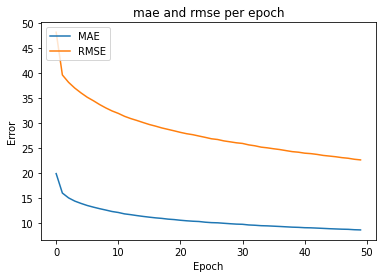

In [32]:
plt.plot(history.history['mae'])
plt.plot(history.history['root_mean_squared_error'])
plt.title('mae and rmse per epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['MAE', 'RMSE'], loc='upper left')
plt.show()

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 16)               3         
 ion)                                                            
                                                                 
 dense_28 (Dense)            (None, 500)               8500      
                                                                 
 dense_29 (Dense)            (None, 400)               200400    
                                                                 
 dense_30 (Dense)            (None, 200)               80200     
                                                                 
 dense_31 (Dense)            (None, 100)               20100     
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                      

In [33]:
y_pred=model.predict(x_test)
y_pred

8870/8870 [==============================] - 43s 5ms/step


array([[746.4697 ],
       [  0.     ],
       [788.9442 ],
       ...,
       [  0.     ],
       [  0.     ],
       [198.97935]], dtype=float32)

In [34]:
from sklearn.metrics import r2_score 
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination R2', R_square) 
from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Model MSE", metrics.mean_squared_error(y_test, y_pred))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficient of Determination R2 0.9896821391305629
Model MAE 10.458357332730765
Model MSE 959.2765928769976
Model RMSE 30.972190637360438


# Test

## Cupertino

In [36]:
import pandas as pd
df =pd.read_csv('/content/cupertino_test.csv')
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
df = df.dropna()
df.isnull().sum()
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]


target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)

input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 3ms/step
Model MAE 147.62524568995386
Model MSE 38451.65866346633
Model RMSE 196.09094487881467


## Foster City

In [37]:
import pandas as pd
df =pd.read_csv('/content/fostercity_test.csv')
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
df = df.dropna()
df.isnull().sum()
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 3ms/step
Model MAE 142.46380580170515
Model MSE 36524.028776708095
Model RMSE 191.11260758178173


## Los Gatos

In [38]:
import pandas as pd
df =pd.read_csv('/content/losgatos_test.csv')
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
df = df.dropna()
df.isnull().sum()
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 3ms/step
Model MAE 149.09771028257396
Model MSE 38955.25427225886
Model RMSE 197.37085466770128


## Saratoga

In [39]:
import pandas as pd
df =pd.read_csv('/content/saratoga_2020.csv')
#df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
df = df.dropna()
df.isnull().sum()
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

58/58 [==============================] - 0s 3ms/step
Model MAE 155.96121925941884
Model MSE 42414.50579248864
Model RMSE 205.94782298555293
